In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [7]:
# Load the .npy file
# cube_data = np.load("data_cube_20250507_165419.npy")

# Ensure the data is 3D
# if cube_data.ndim != 3:
    # raise ValueError("The loaded .npy file must contain a 3D array.")

In [8]:
## Helper methods

def extract_roi(data, x_start, x_end, y_start, y_end):
    """
    Extract a region of interest (ROI) from the 3D data cube.
    """
    if x_start < 0 or x_end > data.shape[0] or y_start < 0 or y_end > data.shape[2]:
        raise ValueError("ROI coordinates are out of bounds.")
    return data[x_start:x_end, :, y_start:y_end]




def create_rgb_composite(data, bands=(30, 20, 10)):  # NIR, Red, Green
    """
    Create RGB composite from selected bands
    """
    rgb = np.stack([data[:, band, :] for band in bands], axis=-1)  # Correct indexing
    
    # Normalize each channel separately
    rgb_norm = rgb - rgb.min(axis=(0, 1), keepdims=True)
    rgb_norm = rgb_norm / rgb_norm.max(axis=(0, 1), keepdims=True)
    
    # Apply gamma correction
    gamma = 1.5
    rgb_final = np.power(rgb_norm, 1 / gamma)
    
    return rgb_final

def analyze_band_statistics(data):
    """
    Compute basic statistics for each band
    """
    stats = {
        'mean': np.mean(data, axis=(0, 2)),
        'std': np.std(data, axis=(0, 2)),
        'min': np.min(data, axis=(0, 2)),
        'max': np.max(data, axis=(0, 2))
    }
    return stats


In [9]:
# Get the number of bands
num_bands = cube_data.shape[1]  # Bands are along the second axis
print(f"The dataset contains {num_bands} bands (0 to {num_bands - 1}).")

# Select a specific band (e.g., along the Z-axis)
band_index = 180  # Change this to the desired band index
if band_index < 0 or band_index >= num_bands:
    raise IndexError(f"Band index {band_index} is out of bounds for the Z-axis with size {num_bands}.")

# Extract the selected band
band_data = cube_data[:, band_index, :]  # Slice along the second axis

# Normalize the band data for visualization
normalized_band = (band_data - band_data.min()) / (band_data.max() - band_data.min())


NameError: name 'cube_data' is not defined

In [8]:
print("Band statistics:")
stats = analyze_band_statistics(cube_data)
for band_index, stat in enumerate(stats['mean']):
    print(f"Band {band_index}: Mean = {stat:.4f}, Std = {stats['std'][band_index]:.4f}, Min = {stats['min'][band_index]}, Max = {stats['max'][band_index]}")
    

Band statistics:
Band 0: Mean = 235.0036, Std = 553.2628, Min = 137, Max = 64128
Band 1: Mean = 212.8247, Std = 4.8133, Min = 138, Max = 232
Band 2: Mean = 213.4624, Std = 4.7640, Min = 149, Max = 235
Band 3: Mean = 213.6797, Std = 4.9307, Min = 150, Max = 246
Band 4: Mean = 213.8122, Std = 5.2241, Min = 149, Max = 256
Band 5: Mean = 213.6838, Std = 5.0224, Min = 145, Max = 241
Band 6: Mean = 213.6971, Std = 5.0139, Min = 149, Max = 248
Band 7: Mean = 213.7114, Std = 5.3235, Min = 147, Max = 248
Band 8: Mean = 214.4691, Std = 5.2511, Min = 149, Max = 254
Band 9: Mean = 214.8748, Std = 5.4689, Min = 147, Max = 258
Band 10: Mean = 214.1248, Std = 5.4944, Min = 150, Max = 260
Band 11: Mean = 214.2643, Std = 5.5640, Min = 146, Max = 261
Band 12: Mean = 214.4683, Std = 5.5643, Min = 150, Max = 263
Band 13: Mean = 215.2503, Std = 5.8536, Min = 152, Max = 269
Band 14: Mean = 214.6420, Std = 5.9097, Min = 148, Max = 280
Band 15: Mean = 215.0125, Std = 6.0812, Min = 152, Max = 283
Band 16: Mean

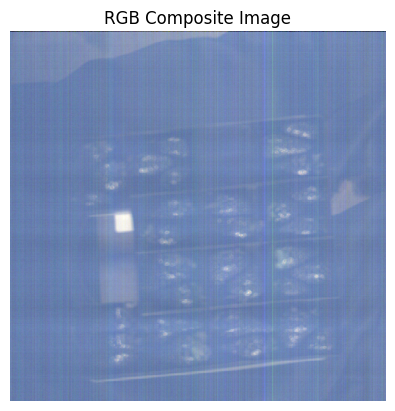

In [9]:
# Create an RGB composite image
rgb_image = create_rgb_composite(cube_data, bands=(30, 20, 10))  # NIR, Red, Green
plt.imshow(rgb_image)
plt.title("RGB Composite Image")
plt.axis("off")
plt.show()


In [11]:
x_start, x_end = 140, 140 + 20  # Define X-axis range for a 20-pixel square ROI
y_start, y_end = 160, 160 + 20  # Define Y-axis range for a 20-pixel square ROI
roi_data = extract_roi(cube_data, x_start, x_end, y_start, y_end)
print(f"Extracted ROI shape: {roi_data.shape}")

Extracted ROI shape: (20, 224, 20)


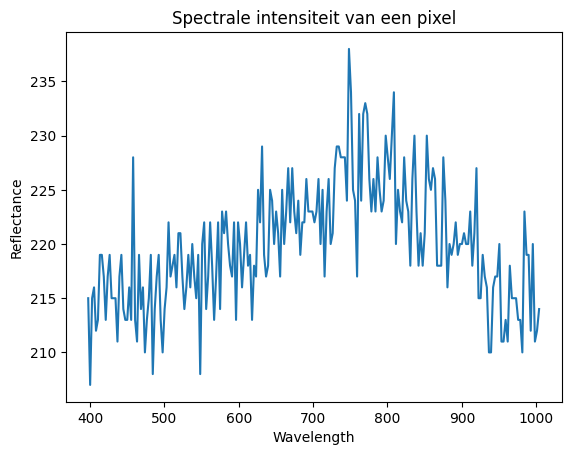

In [15]:
# Extract a single pixel's spectral data
pixel_y = 164
pixel_x = 146

pixel_data = cube_data[
    pixel_y:pixel_y+1,
    :,
    pixel_x:pixel_x+1
]

pixel_data_squeezed = np.squeeze(pixel_data)

# Generate a range of bands for plotting
bands = np.genfromtxt('bands.csv', delimiter=',')


plt.plot(bands, pixel_data_squeezed)
plt.title('Spectrale intensiteit van een pixel')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

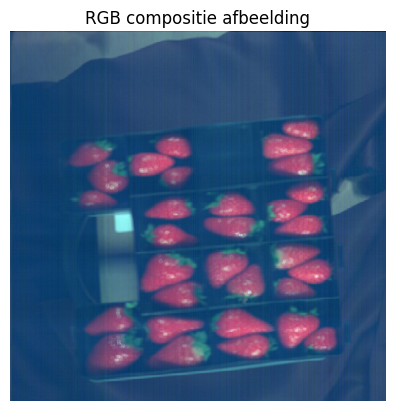

In [13]:
# Define the wavelength ranges for Red, Green, and Blue
red_range = (620, 750)   # Approximate range for red in nm
green_range = (495, 570) # Approximate range for green in nm
blue_range = (450, 495)  # Approximate range for blue in nm

# Find the indices of the bands that correspond to these wavelength ranges
red_band = np.argmin(np.abs(np.array(bands) - np.mean(red_range)))
green_band = np.argmin(np.abs(np.array(bands) - np.mean(green_range)))
blue_band = np.argmin(np.abs(np.array(bands) - np.mean(blue_range)))

# Create an RGB composite image using the identified bands
rgb_image = create_rgb_composite(cube_data, bands=(red_band, green_band, blue_band))

# Display the RGB image
plt.imshow(rgb_image)
plt.title("RGB compositie afbeelding")
plt.axis("off")
plt.show()

In [49]:
!pip install -U scikit-learn

In [50]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
         
         Copyright (c) 2007-2024 The scikit-learn developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
         
         * Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse 

In [51]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
executable: c:\Users\moust\miniconda3\envs\hsi_env\python.exe
   machine: Windows-10-10.0.26100-SP0

Python dependencies:
      sklearn: 1.6.1
          pip: 25.0
   setuptools: 75.8.0
        numpy: 2.1.3
        scipy: 1.15.2
       Cython: None
       pandas: None
   matplotlib: 3.10.1
       joblib: 1.4.2
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libscipy_openblas
       filepath: C:\Users\moust\miniconda3\envs\hsi_env\Lib\site-packages\numpy.libs\libscipy_openblas64_-c16e4918366c6bc1f1cd71e28ca36fc0.dll
        version: 0.3.27
threading_layer: pthreads
   architecture: Haswell

       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: C:\Users\moust\miniconda3\envs\hsi_env\Lib\site-packages\sklearn\.libs\vco

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import spectral as spy
import matplotlib.patches as mpatches


In [53]:
def hypermnf(cube, numComponents, mean_centered=True):
    if mean_centered:
        cube = cube.astype(np.float64)  # Convert to float64 to avoid type mismatch
        u = np.mean(cube, axis=0)
        cube -= u  # Subtract the mean

    # Reshape the cube to 2D (pixels x bands)
    reshaped_cube = cube.reshape(cube.shape[0], -1).T  # Transpose to (pixels, bands)

    # Compute the difference along the spectral axis
    V = np.diff(reshaped_cube, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(V, rowvar=False)

    # Perform eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(covariance_matrix)
    idx = np.argsort(eigvals)[::-1]  # Sort eigenvalues in descending order
    eigvecs = eigvecs[:, idx]

    # Select the top `numComponents` eigenvectors
    reduced_cube = np.dot(reshaped_cube, eigvecs[:, :numComponents])
    return reduced_cube.reshape(cube.shape[1], cube.shape[2], numComponents)

In [69]:
img = np.load("apple_datacube.npy")

# Swap the middle and last rows
middle_row = img.shape[0] // 2
img[[middle_row, -1]] = img[[-1, middle_row]]

# Exclude the last band if it contains NaN values
if np.isnan(img[:, :, -1]).any():
    img = img[:, :, :-1]

In [62]:
# Preprocess the image (e.g., using MNF/PCA for dimensionality reduction)

numComponents = 10  # Reduce to 3 components for clustering
reduced_img = hypermnf(img, numComponents)

In [63]:
# Reshape image for clustering
h, w, _ = reduced_img.shape
img_reshaped = reduced_img.reshape(-1, numComponents)

# Apply K-means clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(img_reshaped)

In [64]:
# Apply Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(img_reshaped)

# Reshape the cluster labels to the original image shape
kmeans_image = kmeans_labels.reshape(h, w)
gmm_image = gmm_labels.reshape(h, w)

# Define class names (optional)
classNames = [f'class {i+1}' for i in range(num_clusters)]

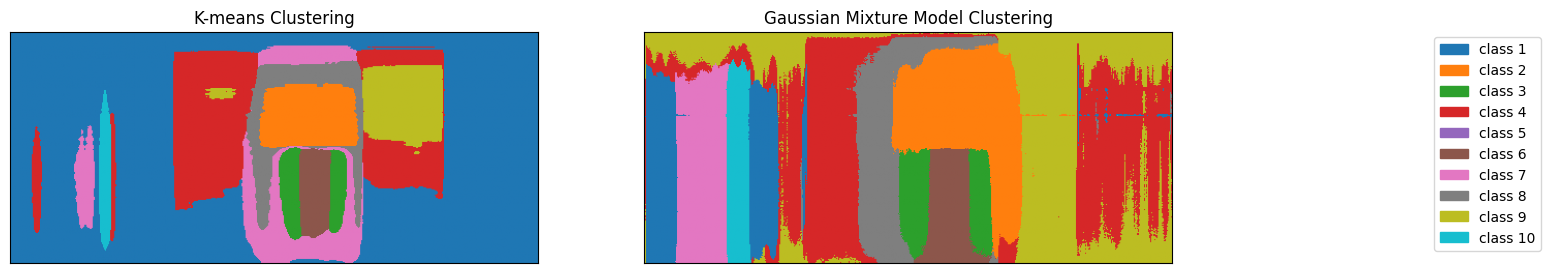

In [65]:
# Plot the results for comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# K-means result
ax[0].imshow(kmeans_image, cmap='tab10')
ax[0].set_title('K-means Clustering')
ax[0].set_aspect('equal', adjustable='box')
ax[0].set_xticks([])
ax[0].set_yticks([])

# GMM result
ax[1].imshow(gmm_image, cmap='tab10')
ax[1].set_title('Gaussian Mixture Model Clustering')
ax[1].set_aspect('equal', adjustable='box')
ax[1].set_xticks([])
ax[1].set_yticks([])

# Create dummy patches for legend
legend_patches = [mpatches.Patch(color=plt.cm.tab10(i), label=classNames[i]) for i in range(num_clusters)]

# Display legend
fig.legend(handles=legend_patches, loc='center right', bbox_to_anchor=(1.15, 0.5))


In [21]:
import os
import numpy as np
from datetime import datetime

data_dir = "data_cubes" 

# List all .npy files
files = [f for f in os.listdir(data_dir) if f.endswith(".npy")]

# Extract timestamps and sort files
def extract_datetime(filename):
    dt_str = filename.split('_')[2] + filename.split('_')[3].split('.')[0]  # '20250507' + '165003'
    return datetime.strptime(dt_str, "%Y%m%d%H%M%S")

files_sorted = sorted(files, key=extract_datetime)

# Load the data cubes in time order
data_cubes = [np.load(os.path.join(data_dir, f)) for f in files_sorted]
timestamps = [extract_datetime(f) for f in files_sorted]


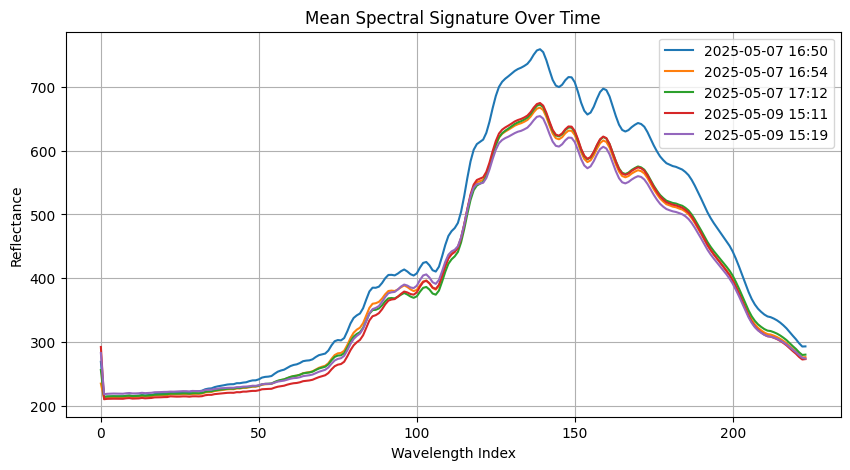

In [22]:
import matplotlib.pyplot as plt

# Compute mean spectrum for each cube
mean_spectra = [np.mean(cube, axis=(0, 2)) for cube in data_cubes]  # shape: [wavelengths]

# Plot each spectrum
plt.figure(figsize=(10, 5))
for i, spectrum in enumerate(mean_spectra):
    plt.plot(spectrum, label=timestamps[i].strftime('%Y-%m-%d %H:%M'))
plt.legend()
plt.title('Mean Spectral Signature Over Time')
plt.xlabel('Wavelength Index')
plt.ylabel('Reflectance')
plt.grid(True)
plt.show()


In [23]:
for i, spectrum in enumerate(data_cubes):
    print(f"Spectrum {i} shape: {spectrum.shape}")



Spectrum 0 shape: (512, 224, 512)
Spectrum 1 shape: (504, 224, 512)
Spectrum 2 shape: (365, 224, 1024)
Spectrum 3 shape: (802, 224, 512)
Spectrum 4 shape: (496, 224, 512)


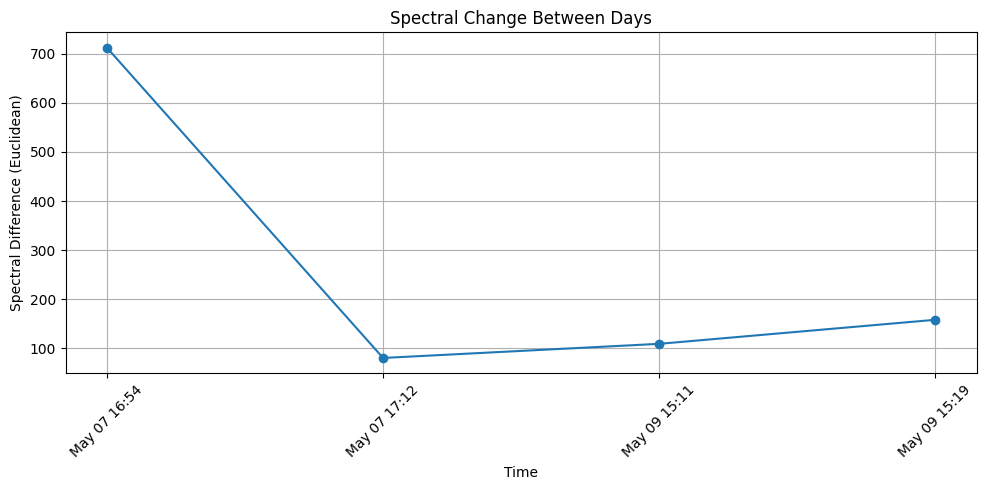

In [24]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def compute_spectral_differences(spectra):
    """Compute Euclidean differences between consecutive spectra."""
    return [euclidean(spectra[i + 1], spectra[i]) for i in range(len(spectra) - 1)]

def plot_spectral_differences(differences, timestamps, title="Spectral Change Between Days"):
    """Plot spectral differences over time."""
    time_labels = [t.strftime('%b %d %H:%M') for t in timestamps[1:]]
    x_positions = range(1, len(timestamps))

    plt.figure(figsize=(10, 5))
    plt.plot(x_positions, differences, marker='o', linestyle='-')
    plt.xticks(x_positions, time_labels, rotation=45)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Spectral Difference (Euclidean)")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# --- Main ---
diffs = compute_spectral_differences(mean_spectra)
plot_spectral_differences(diffs, timestamps)


In [28]:
def generate_rgb_composite(data_cube, bands, red_range=(620, 750), green_range=(495, 570), blue_range=(450, 495)):
    """
    Generate an RGB composite image from a data cube using specified wavelength ranges.

    Parameters:
    - data_cube (numpy.ndarray): The input 3D data cube.
    - bands (numpy.ndarray): Array of band wavelengths.
    - red_range (tuple): Wavelength range for the red channel (default: (620, 750)).
    - green_range (tuple): Wavelength range for the green channel (default: (495, 570)).
    - blue_range (tuple): Wavelength range for the blue channel (default: (450, 495)).

    Returns:
    - rgb_composite (numpy.ndarray): The generated RGB composite image.
    """
    # Find the indices of the bands that correspond to the wavelength ranges
    red_band = np.argmin(np.abs(bands - np.mean(red_range)))
    green_band = np.argmin(np.abs(bands - np.mean(green_range)))
    blue_band = np.argmin(np.abs(bands - np.mean(blue_range)))

    # Stack the selected bands into an RGB image
    rgb = np.stack([data_cube[:, red_band, :], data_cube[:, green_band, :], data_cube[:, blue_band, :]], axis=-1)

    # Normalize each channel separately
    rgb_norm = rgb - rgb.min(axis=(0, 1), keepdims=True)
    rgb_norm = rgb_norm / rgb_norm.max(axis=(0, 1), keepdims=True)

    # Apply gamma correction
    gamma = 1.5
    rgb_composite = np.power(rgb_norm, 1 / gamma)

    return rgb_composite


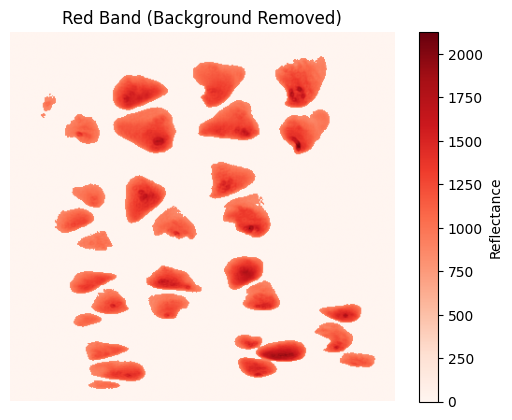

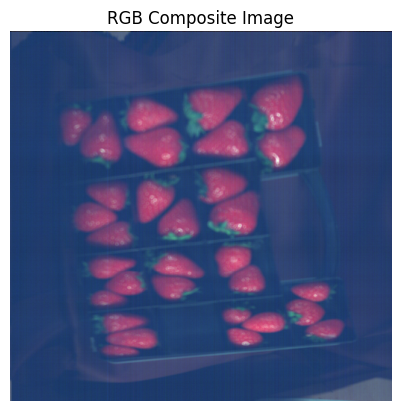

In [30]:
def process_band(data_cube, bands, band_range, crop_margin=50):
    """
    Process a specific band from the data cube by cropping, thresholding, and removing the background.

    Parameters:
    - data_cube (numpy.ndarray): The input 3D data cube.
    - bands (numpy.ndarray): Array of band wavelengths.
    - band_range (tuple): The wavelength range for the desired band (e.g., (620, 750) for red).
    - crop_margin (int): The margin to crop from the edges of the data cube.

    Returns:
    - processed_band (numpy.ndarray): The processed band with background removed.
    """
    # Crop the data cube to focus on the central region
    height, width = data_cube.shape[0], data_cube.shape[2]
    cropped_data_cube = data_cube[crop_margin:height-crop_margin, :, crop_margin:width-crop_margin]

    # Find the index of the desired band
    band_index = np.argmin(np.abs(bands - np.mean(band_range)))
    band_data = cropped_data_cube[:, band_index, :]

    # Dynamically calculate a threshold based on the data range
    threshold = band_data.mean() + band_data.std()  # Mean + 1 standard deviation
    binary_mask = band_data > threshold

    # Apply the mask to remove the background
    processed_band = np.where(binary_mask, band_data, 0)

    return processed_band

# Example usage
data_cube = np.load("data_cubes\data_cube_20250509_151914.npy")  # Load your data cube
bands = np.genfromtxt('bands.csv', delimiter=',')  # Load the bands
red_range = (620, 750)  # Define the wavelength range for red

red_band_data_no_background = process_band(data_cube, bands, red_range)
rgb_composite = generate_rgb_composite(data_cube, bands)


# Display the result
plt.imshow(red_band_data_no_background, cmap='Reds')
plt.title("Red Band (Background Removed)")
plt.colorbar(label="Reflectance")
plt.axis("off")
plt.show()

# Display the RGB composite image
plt.imshow(rgb_composite)
plt.title("RGB Composite Image")
plt.axis("off")
plt.show()




# # Show the red_band_data_no_background numpy array
# print(red_band_data_no_background)
# # Save the modified data cube
# output_filename = "red_band_data_no_background.npy"
# np.save(output_filename, red_band_data_no_background)

In [31]:
data_dir = "data_cubes"  # Directory containing the .npy files
files = [f for f in os.listdir(data_dir) if f.endswith(".npy")]
data_cubes = [np.load(os.path.join(data_dir, f)) for f in files_sorted]
timestamps = [extract_datetime(f) for f in files_sorted]

# Process each data cube so most of the background is removed
processed_cubes = []
for cube in data_cubes:
    processed_cube = process_band(cube, bands, red_range)
    processed_cubes.append(processed_cube)
    



    

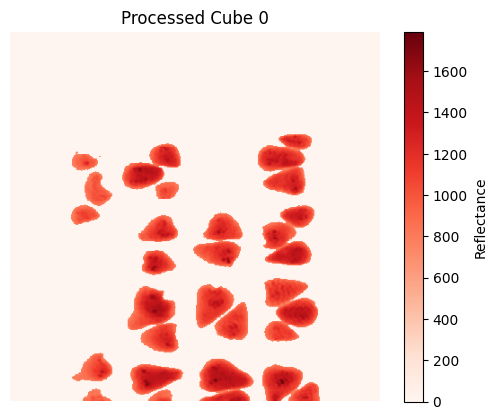

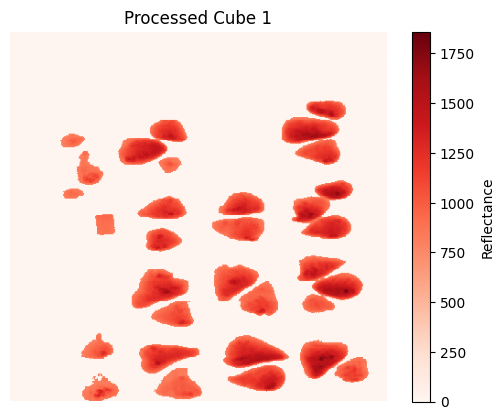

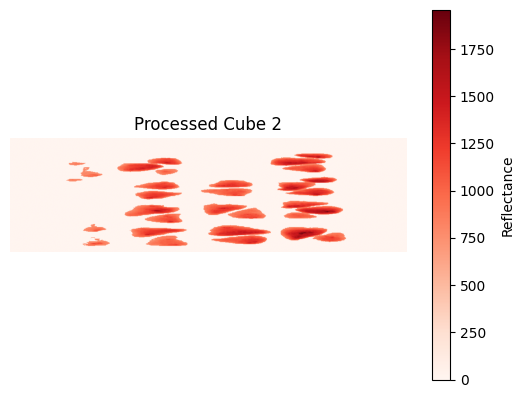

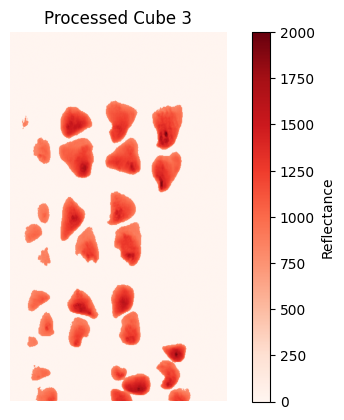

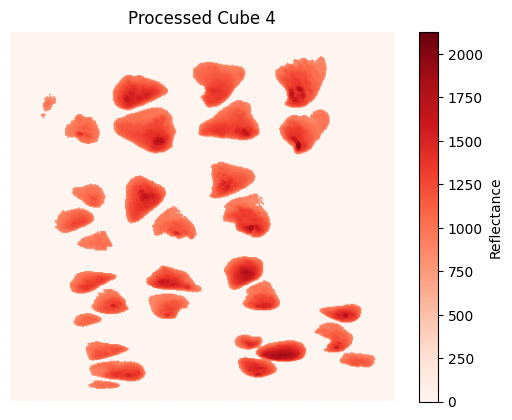

In [32]:
# Display the processed cubes
for i, processed_cube in enumerate(processed_cubes):
    plt.imshow(processed_cube, cmap='Reds')
    plt.title(f"Processed Cube {i}")
    plt.colorbar(label="Reflectance")
    plt.axis("off")
    plt.show()


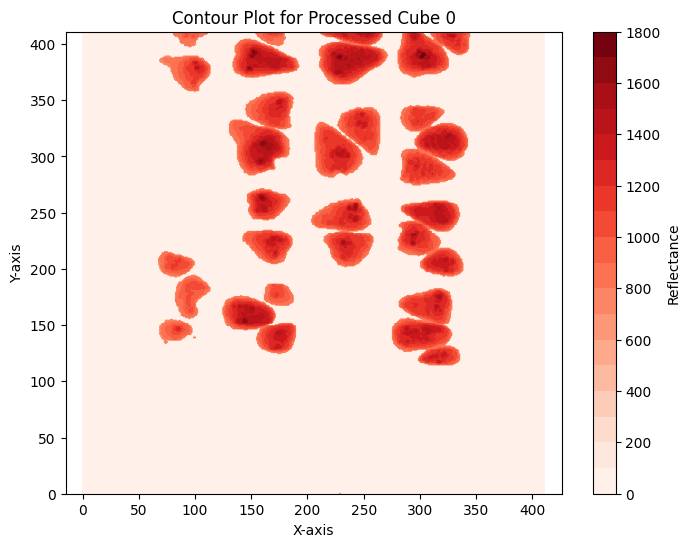

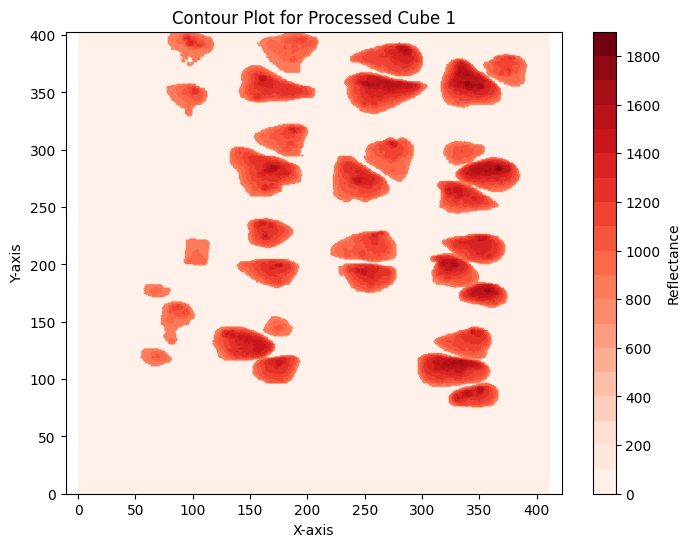

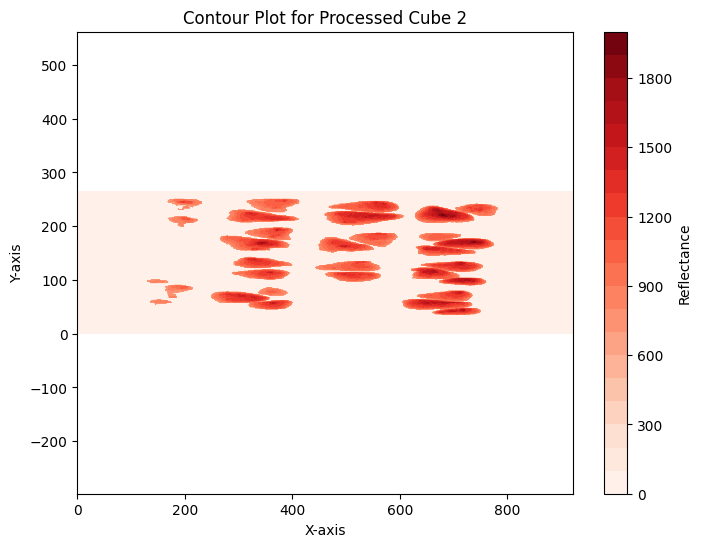

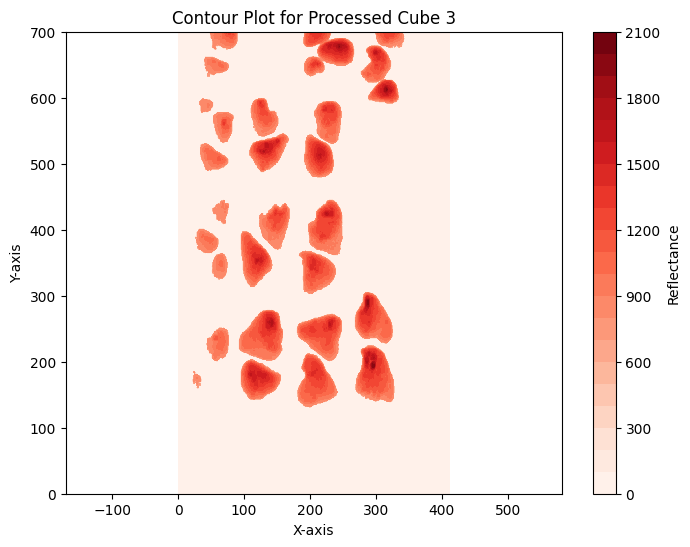

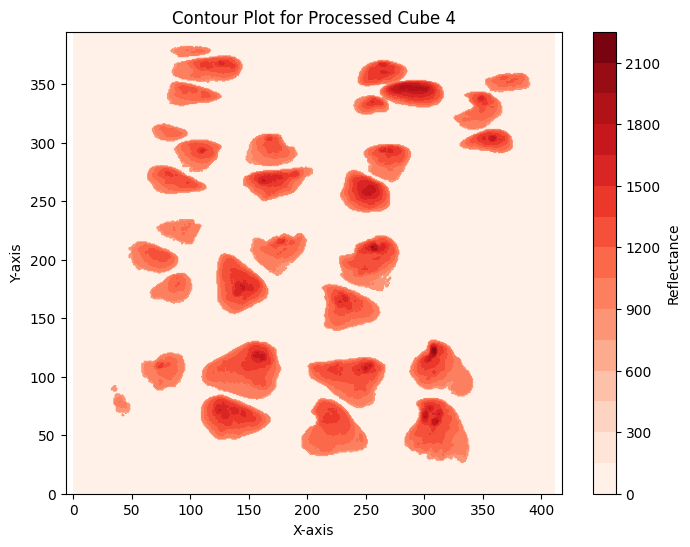

In [33]:
# Perform contour plotting for each processed cube
for i, processed_cube in enumerate(processed_cubes):
    plt.figure(figsize=(8, 6))
    plt.contourf(processed_cube, levels=20, cmap='Reds')  # Adjust levels and colormap as needed
    plt.colorbar(label="Reflectance")
    plt.title(f"Contour Plot for Processed Cube {i}")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.axis("equal")
    plt.show()

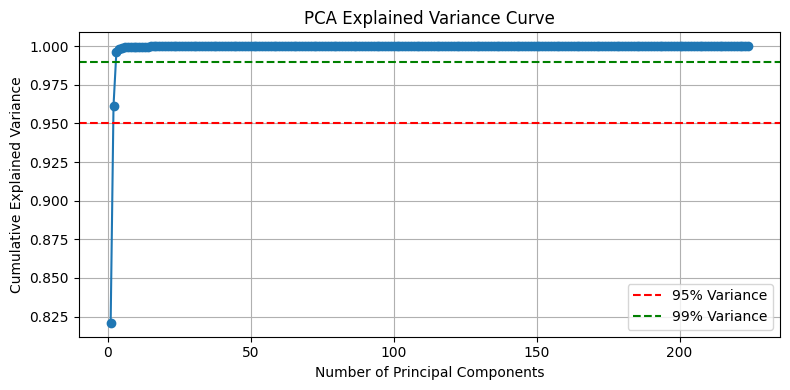

PCA image saved to: pca_output/pca_image.npy


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

# === Load the Hyperspectral Data Cube ===
# Assumes the data is in shape (height, bands, width)
data_path = "data_cubes/data_cube_20250509_151914.npy"
hsi_data = np.load(data_path)

# === Reshape the Cube to 2D (pixels x bands) ===
h, bands, w = hsi_data.shape
reshaped_data = hsi_data.transpose(1, 0, 2).reshape(bands, -1).T  # (height * width, bands)
reshaped_data = reshaped_data.astype(np.float64)

# === Normalize the Data (Zero Mean) ===
reshaped_data -= np.mean(reshaped_data, axis=0)

# === PCA Variance Analysis (Optional but Recommended) ===
pca_full = PCA()
pca_full.fit(reshaped_data)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# === Plot Explained Variance to Help Choose Components ===
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Choose Number of Components (Manual or Auto) ===
# Option 1: Manually set number of components
num_components = 10

# Option 2 (Recommended): Auto-select to retain 95% variance
# pca = PCA(n_components=0.95)
# pca_result = pca.fit_transform(reshaped_data)
# num_components = pca.n_components_

# === Apply PCA ===
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(reshaped_data)  # (pixels, components)

# === Reshape Back to Image Format (height, width, components) ===
pca_image = pca_result.T.reshape(num_components, h, w).transpose(1, 2, 0)

# === Save the PCA Output if Needed ===
output_path = "pca_output/pca_image.npy"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
np.save(output_path, pca_image)
print(f"PCA image saved to: {output_path}")


Original data cube shape: (496, 224, 512)
PCA image shape: (496, 512, 10)


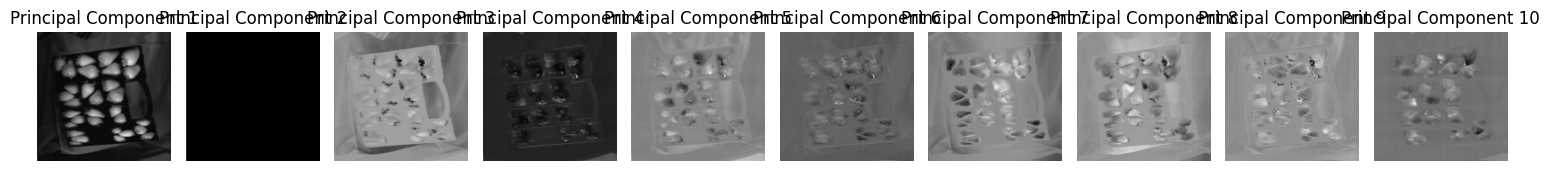

In [40]:
data_path = "pca_output/pca_image.npy"
pca_image = np.load(data_path)
data_cube = np.load("data_cubes/data_cube_20250509_151914.npy")
print(f"Original data cube shape: {data_cube.shape}")
print(f"PCA image shape: {pca_image.shape}")
# === Visualize the First Three Principal Components ===
plt.figure(figsize=(15, 5))
for i in range(pca_image.shape[2]):
    # Ensure the PCA image is in the correct shape
    if pca_image.shape[2] != num_components:
        raise ValueError(f"Expected {num_components} components, but got {pca_image.shape[2]}.")
    plt.subplot(1, pca_image.shape[2], i + 1)
    plt.imshow(pca_image[:, :, i], cmap='gray')
    plt.title(f"Principal Component {i + 1}")
    plt.axis("off")
plt.tight_layout()
plt.show()
